# Production d’eau douce par osmose inverse

On souhaite implanter une usine de dessalement sur l’ile de Curaçao pouvant produire 3 000 m3 d’eau par jour et répondre ainsi aux besoins en eau de 20 000 habitants. 
1. Est-ce que la capacité de production de l’usine vous semble adéquate par rapport aux besoins en eau des habitants ?

In [136]:
#Données
Q=3000  #m3/jours débit de production de l'usine
N=20000 #habitants 

# Calcul de la production par habitants
P=Q/N         #m3.jours-1.habitants-1
P1=Q*1000/N   #L.jours-1.habitants-1
print ('La production est de {} L par jours et par habitants ce qui est l ordre de grandeur de la consommation par personne en 2022'.format(P1)) 

La production est de 150.0 L par jours et par habitants ce qui est l ordre de grandeur de la consommation par personne en 2022


On dispose d’une membrane d’osmose inverse avec une perméabilité à l’eau A= 3.10-12 m/(s.Pa).

2. Calculer la surface de membrane à installer en m2 pour dessaler 3 000 m3 d’eau par jour avec une pression appliquée de 50 atm. Le compartiment côté eau douce est à la pression atmosphérique.

>On utilise la loi de filtration suivante :
>$$Q=A~S(\Delta P - \Delta \Pi)$$
>où 
>- Q est le débit à travers la membrane (m3.s-1)
>- A est la perméabilité de la membrane (m.s-1.Pa-1)
>- S est la surface de la membrane (m2)
>- $\Delta P - \Delta \Pi$ est la pression de filtration effective
>- $\Delta P= P_s -P_d$ où $P_s$ est la pression appliquée sur le compartiment eau de mer et $P_d$ est la pression sur le compartiment eau douce
>- $\Delta \Pi= \Pi_s -\Pi_d$ où $\Pi_s$ est la pression osmotique du compartiment eau de mer et $\Pi_d$ est la pression osmotique dans compartiment eau douce
> On considèrera que le compartiment eau douce est la pression atmosphérique et que la pression osmotique de l'eau douce est nulle (ce qui est le cas s'il y a peu de sels).
>
>La pression osmotique peut être estimée (en considérant le cas idéal) par la relation de Van't Hoff :
$$\Pi=c~R~T$$
> où c est le nombre de moles par $m^3$ d'espèces dissociées

In [137]:
#Données
Q=Q/(24*3600)   #m3/s
atm=1.013e5     #Pa
Ps=50*atm       #Pa (Pression appliquée eau de mer)
Pd=atm          #Pa (Pression eau douce)
Pid=0           #Pa (Pression osmotique eau douce)
cNaCl=30        #g/L (Concentration en NaCl eau de mer)
MNaCl=58.5      #g/mol
R=8.32          #J.mol-1.K-1
T=298           #K
A=3e-12         #m.s-1.Pa-1

cs=cNaCl/MNaCl    #mol/L
Pis=2*cs*1000*R*T #Pa
print ('La pression osmotique de l eau mer est {:.2f} Atm'.format(Pis/atm))

S=Q/(A*(Ps-Pd-(Pis-Pid)))
print ('La surface de membrane nécessaire est {:.2f} m2'.format(S))

La pression osmotique de l eau mer est 25.10 Atm
La surface de membrane nécessaire est 4781.16 m2


3. Comparer à la surface d’eau nécessaire pour obtenir le même débit par condensation de l'eau issu de l'évaporation solaire (en utilisant les résultats du TD précédent). Il faudrait alors condenser toute l'eau évaporée sur cette surface.

In [138]:
jevap=3.41e-05   #kg s-1 m-2

jcond=jevap      #kg s-1 m-2
jcond=jcond*1e-3 #m3 s-1 m-2

#Q=S_eau*jcond
S_eau=Q/jcond
print ('La surface de membrane nécessaire est {:.2f} m2 ou {:.2f} km2'.format(S_eau, S_eau/1e6))

La surface de membrane nécessaire est 1018246.99 m2 ou 1.02 km2


Le dessalement engendre la production de saumure : une solution concentrée en sels. Pour estimer le débit de saumure, on fixe ici une concentration en sels dans la saumure ne dépassant pas 50 g/L pour éviter les problèmes de précipitation du sel dans le procédé d'osmose inverse et pour éviter d’avoir une contre pression osmotique trop importante.

> Cette partie de code trace le flowsheet avec les inconnus

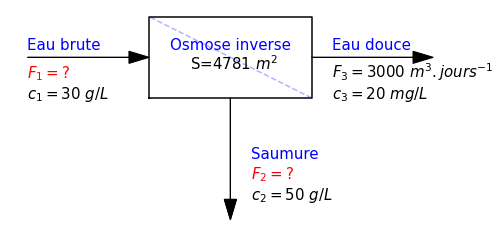

In [139]:
import matplotlib.pyplot as plt
#tracé du flowsheet
xs, ys = 40, 40       #position du separateur
lx, ly = 40, 20       #taille du separateur
la, hla, hwa=25, 5,3  #taille des fleches

def plot_flowsheet_OI():
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect( 1 )
    plt.axis('off')
    plt.plot([xs,xs+lx,xs+lx,xs,xs],[ys,ys,ys+ly,ys+ly,ys],'k')
    plt.plot([xs+lx,xs],[ys,ys+ly],'b--',alpha=0.3)
    plt.arrow(xs-la-hla,ys+ly/2,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx,ys+ly/2,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx/2,ys,0,-la, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx/2,ys,0,-la, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.text(45,52,'Osmose inverse',c='b', size=15)
    plt.text(50,47,'S={:.0f}'.format(S)+r"$~m^2$", size=15)
    plt.text(xs-la-hla,ys+ly/2+2, 'Eau brute',color='b', size=15)
    plt.text(xs-la-hla,ys+ly/2-10, r"$c_{1}=30~g/L$", size=15)
    plt.text(xs+lx/2+5,ys-15, 'Saumure',color='b', size=15)
    plt.text(xs+lx/2+5,ys-25, r"$c_{2}= 50~g/L$", size=15)
    plt.text(xs+lx+5,ys+ly/2+2, 'Eau douce',color='b', size=15)
    plt.text(xs+lx+5,ys+ly/2-5, r"$F_{3}=3000~m^3.jours^{-1}$", size=15)
    plt.text(xs+lx+5,ys+ly/2-10, r"$c_{3}=20~mg/L$", size=15)

plot_flowsheet_OI()    
plt.text(xs-la-hla,ys+ly/2-5, r"$F_{1}=?$", color='r', size=15)
plt.text(xs+lx/2+5,ys-20, r"$F_{2}=?$", color='r',size=15)
plt.show()

4. Compléter le flowsheet en effectuant des bilans pour trouver $F_1$ et $F_2$.

> On peut écrire deux équations (1 bilan global et un bilan partiel) pour trouver les deux inconnues $F_1$ et $F_2$ :
>$$F_1=F_2+F_3$$
>$$F_1~c_1=F_2~c_2+F_3~c_3$$
>On cherche alors à exprimer $F_1$ à partir des deux équations en écrivant $F_2$ comme $F_1-F_3$ dans la deuxième équation :
>$$F_1~c_1=(F_1-F_3)~c_2+F_3~c_3$$
>soit :
>$$F_1=F_3\frac{c_3-c_2}{c_1-c_2}$$
>On peut noter que les dimensions de l'équation sont correctes. On peut même vérifier 

Le débit d alimentation est de 0.087 m3/s ou 7497.00 m3/jours
Le débit de saumure est de 0.052 m3/s ou 4497.00 m3/jours


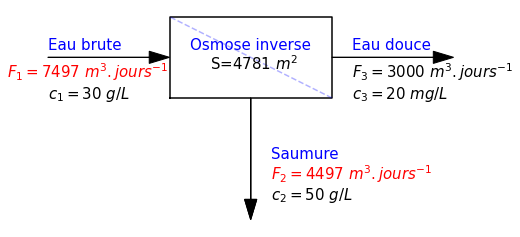

In [140]:
F3=Q      #m3/s
c1=30    #g/L ou kg.m-3
c2=50 #g/L ou kg.m-3
c3=20e-3    #g/L ou kg.m-3
F1=F3*(c3-c2)/(c1-c2)
F2=F1-F3
print('Le débit d alimentation est de {:.3f} m3/s ou {:.2f} m3/jours'.format(F1, F1*24*3600))
print('Le débit de saumure est de {:.3f} m3/s ou {:.2f} m3/jours'.format(F2, F2*24*3600))

#tracé du flowsheet avec les solutions
plot_flowsheet_OI()    
plt.text(0,ys+ly/2-5, r"$F_{1}=$"+'{:.0f}'.format(F1*24*3600)+r"$~m^3.jours^{-1}$", color='r', size=15)
plt.text(xs+lx/2+5,ys-20, r"$F_{2}=$"+'{:.0f}'.format(F2*24*3600)+r"$~m^3.jours^{-1}$", color='r',size=15)
plt.show()

5. En déduire le taux de conversion du procédé.

>Le taux de conversion s'écrit généralement comme le rapport entre le débit d'eau douce produite et le débit d'eau utilisé dans le procédé (ou débit d'alimentation)
$$Y=\frac{F_3}{F_1}$$

In [141]:
Y=F3/F1
print('Le taux de conversion est de {:.2f} %'.format(Y*100))

Le taux de conversion est de 40.02 %


6. Calculer la masse de sels qui finira dans la saumure par jour.

>La masse de sels dans la saumure est $F_2~c_2$

In [142]:
M=F2*c2 #kg.s-1
M=M*24*3600 #kg/jours
print('La masse de sels dans la saumure est {:.3f} kg/jours'.format(M))

La masse de sels dans la saumure est 224850.000 kg/jours


7. Pour déterminer l'empreinte environnementale du procédé, calculer la surface de membrane nécessaire à un habitant 

In [143]:
S_par_hab=S/N
print('La surface de membrane nécessaire par habitant est de {:.3f} m2/hab'.format(S_par_hab))

La surface de membrane nécessaire par habitant est de 0.239 m2/hab


8. ainsi que la quantité de sels additionnelle (liée au dessallement) en kg qui sera rejetée dans l’environnement par jour et par habitant.

>La quantité de sels additionnelle qui sera rejetée dans l'environnement peut se calculer de différentes façons :
>- La surconcentration en sels dans la saumure par rapport à la concentration dans l'eau prélevée dans la mer : $F_2(c_2-c_1)$
>- La quantité de sels enlevée de l'eau produite $F_3(c_1-c_3)$
>Selon les équations de bilans ces deux expressions doivent donner le même résultats : c'est donc un autre bon moyen de vérifier ses résultats.

In [145]:
rejet_sel=F2*(c2-c1)              #kg.s-1
rejet_sel=F2*(c2-c1)*24*3600/N    #kg.jours-1.habitants-1
if round(F2*(c2-c1),3) != round(F3*(c1-c3),3):
    print ('PROBLEME de calcul : différence entre {} et {}'.format(F2*(c2-c1),F3*(c1-c3)))
print('Le surplus de sel rejeté par habitant est de {:.2f} kg.jours-1.hab-1'.format(rejet_sel))

Le surplus de sel rejeté par habitant est de 4.50 kg.jours-1.hab-1
